<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>


In [4]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Data Preparation

## CSV

Let's talk about the messy part of data analytics: preparing data. Before doing the interesting work of data analytics, we need to:

1. Gather the data.
2. Structure the data in such a way that we can work with it in our programs.
3. Clean the data, which may include dealing with missing or unreasonable values.

Here we'll assume gathering the data has been done for us. We'll use a dataset provided by the Dutch *Rijksinstituut voor Volksgezondheid en Milieu* (RIVM, translation: National Institute for Health and Environment). It contains COVID-19 numbers per municipality per day. You should place a copy of the data in a file called `covid-data.csv` located in the same folder as this notebook (be it in Google Colab or locally). You can use the URL below to retrieve it.

- Source: Rijksinstituut voor Volksgezondheid en Milieu
- Data URL: https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [5]:
data_loc = 'covid-data.csv'
covid_data = open(data_loc).read()

Let's take a look at what it looks like by printing the first 1000 characters.

In [6]:
print(covid_data[:1000])

Date_of_report;Date_of_publication;Municipality_code;Municipality_name;Province;Security_region_code;Security_region_name;Municipal_health_service;ROAZ_region;Total_reported;Hospital_admission;Deceased
2021-03-24 10:00:00;2020-02-27;GM0014;Groningen;Groningen;VR01;Groningen;GGD Groningen;Acute Zorgnetwerk Noord Nederland;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0034;Almere;Flevoland;VR25;Flevoland;GGD Flevoland;SpoedZorgNet;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0037;Stadskanaal;Groningen;VR01;Groningen;GGD Groningen;Acute Zorgnetwerk Noord Nederland;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0047;Veendam;Groningen;VR01;Groningen;GGD Groningen;Acute Zorgnetwerk Noord Nederland;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0050;Zeewolde;Flevoland;VR25;Flevoland;GGD Flevoland;SpoedZorgNet;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0059;Achtkarspelen;Fryslân;VR02;Fryslân;GGD Fryslân;Acute Zorgnetwerk Noord Nederland;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0060;Ameland;Fryslân;VR02;Fryslân;GGD Fryslân;Acute

That looks pretty chaotic. The data is in a format called `csv`, which is a commonly used format to store and share data.

1. A `csv` file contains only text.
2. The first line a `csv` file lists column names.
3. Each line after that is a datapoint with values for those columns in the same order.

Let's look at the first 3 lines instead of the first 1000 characters.

In [7]:
for line in covid_data.split('\n')[:3]:
    print(line)

Date_of_report;Date_of_publication;Municipality_code;Municipality_name;Province;Security_region_code;Security_region_name;Municipal_health_service;ROAZ_region;Total_reported;Hospital_admission;Deceased
2021-03-24 10:00:00;2020-02-27;GM0014;Groningen;Groningen;VR01;Groningen;GGD Groningen;Acute Zorgnetwerk Noord Nederland;0;0;0
2021-03-24 10:00:00;2020-02-27;GM0034;Almere;Flevoland;VR25;Flevoland;GGD Flevoland;SpoedZorgNet;0;0;0


**1. What are the column names for this dataset? List them here.**

*TODO: Your answer here.*

- First column Date of Report
- Second column Date of plublication
- Third column Municipality code
- Fourth column Municipality name
- Fifth column Province
- Sixt column Security region code
- Seventh column Security region name
- Eight column Municipal health service
- Nineth column ROAZ region
- Tenth column Total reported
- Eleventh column Hospital admission
- Twelfth column Deceased

**2. Which character separates the datapoints from each other? Put an `x` in the right box.**

- [X] A linebreak
- [ ] A tab
- [ ] A comma

**3. Which character separates the columns within a datapoint from each other?**

*TODO: I think it's a ;*


### Parsing

Let's use this information to read the data into our program in a better way. This is known as [*parsing*](https://en.wikipedia.org/wiki/Parsing). Our goal is to structure the data in such a way that we'll be able to write code like this to make it easier to work with the data:

```python
# For some datapoint, show me the municipality that it concerns.
some_datapoint['Municipality_name']
```

By answering the questions above we have all the information we need to organize the internal *data structure* in this way.

- We know what separates datapoints from each other.
- We know how columns are separated within datapoints.
- We have the column names for each datapoint.

We can use this information to instruct Python -- the programming language we're using here -- to create a *data structure* that we can use like in the example above. Once completed, we'll have *parsed* the CSV file.

**4. What is parsing in your own words?**

*TODO: It's to make the data be adepted so it's easier to analyse and comprehend it*

**5. Fill in the right column delimiter in the code cell below to complete the code.**

In [8]:
# TODO: Change PLACEHOLDER to the actual delimiter.
delimiter = ';' 
# Make sure the delimiter is surrounded by quotes, for example: delimiter = '<' if the delimiter is <

with open(data_loc) as f:
    csv_reader = csv.DictReader(f, delimiter=delimiter)
    print('Municipality name\tTotal cases reported')
    print('{:=>45}'.format(''))
    data_dicts = list(csv_reader)

for row in data_dicts[:15]:
    print('{:<23} {:<5}'.format(row['Municipality_name'], row['Total_reported']))

Municipality name	Total cases reported
Groningen               0    
Almere                  0    
Stadskanaal             0    
Veendam                 0    
Zeewolde                0    
Achtkarspelen           0    
Ameland                 0    
Harlingen               0    
Heerenveen              0    
Leeuwarden              0    
Ooststellingwerf        0    
Opsterland              0    
Schiermonnikoog         0    
Smallingerland          0    
Terschelling            0    


Note: Your delimiter was not filled in (correctly) if you got one of these errors:

```python
TypeError: "delimiter" must be a 1-character string
KeyError: 'Municipality_name'
```

## Metadata

Alright, this is much better that looking at raw text, like we did before parsing. We'll get to even better views of the data later. First, let's take a look at some *metadata* -- data about data.
- The number of datapoints
- The number of columns
- The names of the columns (again)
- The number of missing or empty values
- The number of unique values in each column

In [9]:
from collections import defaultdict

print(f'Number of datapoints: {len(data_dicts)}')
print(f'Number of columns: {len(data_dicts[0])}')
print('Column names:')
for k in data_dicts[0].keys():
    print(f'- {k}')
    
unique_vals = [set() for _ in data_dicts[0].keys()]
missing = 0
for datapoint in data_dicts:
    for i, val in enumerate(datapoint.values()):
        unique_vals[i].add(val)
        if val is None or val == '':
            missing += 1
print(f'Missing/empty values: {missing}')

print('Number of unique values:')
for i, k in enumerate(data_dicts[0].keys()):
    print('- {:<25}{:5}'.format(k, len(unique_vals[i])))

Number of datapoints: 148176
Number of columns: 12
Column names:
- Date_of_report
- Date_of_publication
- Municipality_code
- Municipality_name
- Province
- Security_region_code
- Security_region_name
- Municipal_health_service
- ROAZ_region
- Total_reported
- Hospital_admission
- Deceased
Missing/empty values: 22736
Number of unique values:
- Date_of_report               1
- Date_of_publication        392
- Municipality_code          353
- Municipality_name          353
- Province                    12
- Security_region_code        26
- Security_region_name        26
- Municipal_health_service    25
- ROAZ_region                 12
- Total_reported             366
- Hospital_admission          30
- Deceased                    20


**6. Note three questions that you have about the data based on this metadata. It might be something like:**

> **"What is the first and last *date of publication* in the dataset?"**

*TODO: first 27-2-2020 last 24-3-2021.*

**7. Note another metadata property that you would like to know about that's not listed here.**

*TODO: Increasing hospital admissions in the last 10 day's, is the number of deceased growing, descending. Are there differences between the provinces.*

## Working with dates

Looking at the metadata is a good way to get a feel for what a dataset looks like, and what type of questions you can answer with it. Let's use our example question to proceed with data preparation:

> What is the first and last *date of publication* in the dataset?

To answer this question, we can't just assume the first date is at the top and the last date is at the bottom, or vice versa. We need some way to do compare the dates and find out which one is the first and which one is the last. Let's first inspect a few entries in the `Date_of_publication` column to see what they look like.

In [10]:
print('The current datatype for the Date_of_publication column is:', type(data_dicts[0]['Date_of_publication']))
for row in data_dicts[::int(len(data_dicts) / 20)]:
    print(row['Date_of_publication'])

The current datatype for the Date_of_publication column is: <class 'str'>
2020-02-27
2020-03-17
2020-04-06
2020-04-25
2020-05-15
2020-06-03
2020-06-23
2020-07-13
2020-08-01
2020-08-21
2020-09-09
2020-09-29
2020-10-19
2020-11-07
2020-11-27
2020-12-16
2021-01-05
2021-01-25
2021-02-13
2021-03-05
2021-03-24


We see that the data type is `str`, which is short for *string*, the programming term for *text*. We can't do any clever comparing with just text. We need to *parse* these dates to be able to make comparisons between them. 

Fortunately, the dates are then specified in a certain *date format*. For example, in the Netherlands people often write '24/12/1980' for the 24th day of December in the year 1980. We could specify that format as `DD/MM/YYYY`.

- `DD` stands for 'Two numbers that represent the day'.
- `MM` stands for 'Two numbers that represent the month'.
- `YYYY` stands for 'Four numbers that represent the year'.

If they wrote `-` instead of `/`, like so: '24-12-1980', the format would be `DD-MM-YYYY`.

**8. What is the *date format* in the `Date_of_publication` column in our dataset?**

*TODO: yyyy-mm-dd.*

**9. Fill in this format in the placeholder in the code block below.**

- **Use `%Y` for `YYYY`.**
- **Use `%m` for `MM`.**
- **Use `%d` for `DD`.**

**For example, the Dutch date format ('DD/MM/YYYY' would be `'%d/%m/%Y'`)**

In [36]:
from datetime import datetime

# TODO: Fill in date format for PLACEHOLDER in the next line.
date_format = '%Y-%m-%d'
# Don't modify anything below this line.

for row in data_dicts:
    formatted_date = datetime.strptime(row['Date_of_publication'], date_format).date()
    row['Date_of_publication'] = formatted_date
    
print('The new datatype for the Date_of_publication column is:', type(data_dicts[0]['Date_of_publication']))

The new datatype for the Date_of_publication column is: <class 'datetime.date'>


If you get an error like the following, your `date_format` is not correct yet.

```python
ValueError: time data '2020-02-27' does not match format 'PLACEHOLDER'
```

After filling in `date_format` correctly, you should see a line that confirms that the new datatype for this column is `datetime.date`. Great! Now we can compare the dates in the column and answer our original question:

> What is the first and last *date of publication* in the dataset?

We can now compare the dates with:

- `a > b`: this checks if `a` is *later* than `b`.
- `a < b`: this checks if `a` is *earlier* than `b`.

In [37]:
# We make the assumption that the date of publication of the first datapoint is the only date. 
first_date_of_publication = data_dicts[0]['Date_of_publication']
last_date_of_publication = data_dicts[0]['Date_of_publication']
# Then we see if we can find any earlier ones, or later ones.
for row in data_dicts:
    # Check if this date is earlier than the currently known first date of publication
    if row['Date_of_publication'] < first_date_of_publication:
        # If so, this is now the new earliest date.
        first_date_of_publication = row['Date_of_publication']
    # Check if this date is later than the currently known last date of publication
    elif row['Date_of_publication'] > last_date_of_publication:
        # If so, this is now the new latest date.
        last_date_of_publication = row['Date_of_publication']

print(f'The first date of publication is {first_date_of_publication}')
print(f'The last date of publication is {last_date_of_publication}')
print(f'The dataset spans {(last_date_of_publication - first_date_of_publication).days} days')

The first date of publication is 2020-02-27
The last date of publication is 2021-03-24
The dataset spans 391 days


Cool! We now have a better understanding of what the `Date_of_publication` column looks like.

**10. Explain, in your own words, what a string is.**

*TODO: a string is tekst.*

**11. Explain, in your own words, what a date string is.**

*TODO: date string is date in tekst for example yyyy/mm/dd.*

**12. Explain, in your own words, why we converted date strings to a `datetime.date` type.**

*TODO: So tekst data can be used for calcultions, number of days in between or that the data dates can be used for reference to calculate differece on different dates etc.*


## Working with numbers

We'd like to wrap up this lesson with a nice visualization of how many COVID cases were reported over time in a certain municipality. For that we not only have to work with strings and dates, but also with *numbers*. We can find the right number in the `Total_reported` column, but again, it's not yet in the right format. It's a string, while it needs to be a number.

Let's apply the same strategy that we used with dates before. Note that if you run the cell below multiple times, it will no longer show that the column values used to be a strings -- they were converted the first time.

In [38]:
print('The current datatype for the Total_reported column is:', type(data_dicts[0]['Total_reported']))
for row in data_dicts:
    row['Total_reported'] = int(row['Total_reported'])
print('The new datatype for the Total_reported column is:', type(data_dicts[0]['Total_reported']))

The current datatype for the Total_reported column is: <class 'str'>
The new datatype for the Total_reported column is: <class 'int'>


The new datatype for the `Total_reported` column is `int`, which stands for *integer*. This is the programming term for *whole number*. Bonus: the term for a decimal number is *float*.

**13. Which variable in the code snippet below is an integer? (write an `x` in the right box)**

```python
a = 'Hello, world!'
b = 42
```

- [X] `a`
- [ ] `b`

**14. Which variable in the code snippet below is an integer? (write an `x` in the right box)**

```python
a = '42'
b = 42
```

- [X] `a`
- [ ] `b`

Now that the `Total_reported` column has the correct datatype, let's write a script that tells us the reported number per municipality. For convenience, we first print a list of all the municipalities in the dataset.

**15. Choose one of the municipalities printed in the code block below. Then fill it in (exactly as it was displayed) in the next cell and run it to find the total number of reported cases in that municipality.**

In [41]:
for m in sorted(unique_vals[3]):
    if m != '':
        print('-', m)

- 's-Gravenhage
- 's-Hertogenbosch
- Aa en Hunze
- Aalsmeer
- Aalten
- Achtkarspelen
- Alblasserdam
- Albrandswaard
- Alkmaar
- Almelo
- Almere
- Alphen aan den Rijn
- Alphen-Chaam
- Altena
- Ameland
- Amersfoort
- Amstelveen
- Amsterdam
- Apeldoorn
- Arnhem
- Assen
- Asten
- Baarle-Nassau
- Baarn
- Barendrecht
- Barneveld
- Beek
- Beekdaelen
- Beemster
- Beesel
- Berg en Dal
- Bergeijk
- Bergen (L.)
- Bergen (NH.)
- Bergen op Zoom
- Berkelland
- Bernheze
- Best
- Beuningen
- Beverwijk
- Bladel
- Blaricum
- Bloemendaal
- Bodegraven-Reeuwijk
- Boekel
- Borger-Odoorn
- Borne
- Borsele
- Boxmeer
- Boxtel
- Breda
- Brielle
- Bronckhorst
- Brummen
- Brunssum
- Bunnik
- Bunschoten
- Buren
- Capelle aan den IJssel
- Castricum
- Coevorden
- Cranendonck
- Cuijk
- Culemborg
- Dalfsen
- Dantumadiel
- De Bilt
- De Fryske Marren
- De Ronde Venen
- De Wolden
- Delft
- Den Helder
- Deurne
- Deventer
- Diemen
- Dinkelland
- Doesburg
- Doetinchem
- Dongen
- Dordrecht
- Drechterland
- Drimmelen
- Dronte

In [53]:
# TODO: FILL IN THE MUNICIPALITY YOU'RE INTERESTED IN HERE
municipality = 'Eindhoven'
# DON'T MODIFY ANYTHING BELOW THIS LINE

reported = 0
for row in data_dicts:
    if row['Municipality_name'] == municipality:
        reported += row['Total_reported']
print(f'The total number of reported cases in {municipality} is {reported}')

The total number of reported cases in Eindhoven is 15891


Because we have all the data types in order, we can also easily plot the development of new reported cases for that same municipality. 

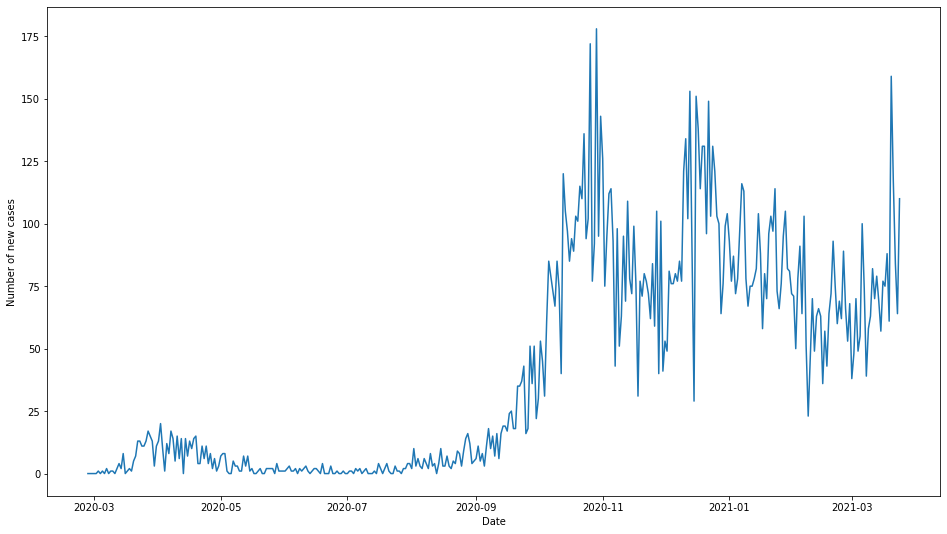

In [54]:
new_cases_per_day = defaultdict(int)
for row in data_dicts:
        if row['Municipality_name'] == municipality:
            new_cases_per_day[row['Date_of_publication']] += row['Total_reported']
new_cases_per_day = sorted(new_cases_per_day.items(), key=lambda x: x[0])

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([date for date, _ in new_cases_per_day], [cases for _, cases in new_cases_per_day])
ax.set_xlabel('Date')
ax.set_ylabel('Number of new cases');

## Missing Data

Finally, a visualization! Let's tackle one final problem: missing data. When we were looking at the metadata, we found that we have $22736$ missing or empty values. Let's print a few datapoints that contain missing values to see what we're dealing with exactly.

In [55]:
for i, row in enumerate(data_dicts):
    missing_keys = []
    for key, val in row.items():
        if val == '':
            missing_keys.append(key)
    if missing_keys:
        print(f'Row {i} contains empty values for: {missing_keys}')

Streaminguitvoer ingekort tot de laatste 5000 regels.
Row 72929 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72930 contains empty values for: ['Municipality_code', 'Municipality_name', 'ROAZ_region']
Row 72931 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72932 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72933 contains empty values for: ['Municipality_code', 'Municipality_name', 'ROAZ_region']
Row 72934 contains empty values for: ['Municipality_code', 'Municipality_name', 'ROAZ_region']
Row 72935 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72936 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72937 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72938 contains empty values for: ['Municipality_code', 'Municipality_name', 'ROAZ_region']
Row 72939 contains empty values for: ['Municipality_code', 'Municipality_name']
Row 72

**16. What column(s) is/are missing most often?**

*TODO: Municipality code and municipality name.*

Missing data may become a problem if we want to draw comparisons between certain parts of the data. Still, there is no universal and definitive *correct approach* to solving the problem of missing data. In fact, in this case there might actually not be a good way to fill in the missing municipalities here.

For the sake of exercise, we will create a new dataset for your chosen municipality where the `Total_reported` new cases will be replaced with the impossible number `-1` from a number of the dates.

**17. Why is `-1` an impossible number here?**

*TODO: A negative covid contamination is't possible.*

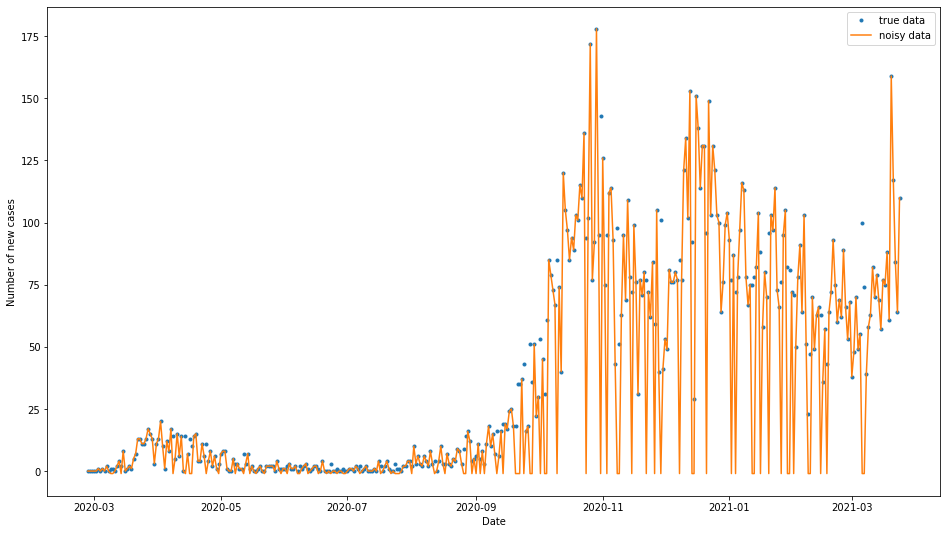

In [56]:
noisy_new_cases_per_day = [(date, cases) if np.random.rand() < 0.8
                           else (date, -1)
                           for date, cases in new_cases_per_day]

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([date for date, _ in new_cases_per_day],
        [cases for _, cases in new_cases_per_day], '.', label='true data')
ax.plot([date for date, _ in noisy_new_cases_per_day],
        [cases for _, cases in noisy_new_cases_per_day],
        label='noisy data')
ax.set_xlabel('Date')
ax.set_ylabel('Number of new cases')
ax.legend();

This plot is a lot more messy than the clean data plot, in addition to also showing the impossible number `-1`.

**18. What would be a good way to fill in the missing values? You will not need to implement them, so use your imagination.**

*TODO: Depends on teh missing data, if a city has given no information with new casus it could be interpolated, calculating the number that's missing.
The data thats's most missing is the municipality code and name so this could be diverted from the security region code or name
I think this should be adressed at teh start of creating the data, make it easy to fil in and let their be no blancs, especialy the name an d zone.*

Here we'll use the mean of the two surrounding dates' values. For example:

1. `2020-02-03` is missing
2. We take the values from the day before, `2020-02-02`, and the day after, `2020-02-04`. If the data from the day before or after is not available, we use the nearest available datapoint instead.
3. We add them up
4. Divide them by $2$
5. We insert the result as the value for `2020-02-03`.

This is a simple way of doing **interpolation** -- estimating missing values within the range of the data we have. This is the opposite of **extrapolation**, where we have estimate values *outside* of the range of the data we have.

Let's see what the implementation and the result look like.

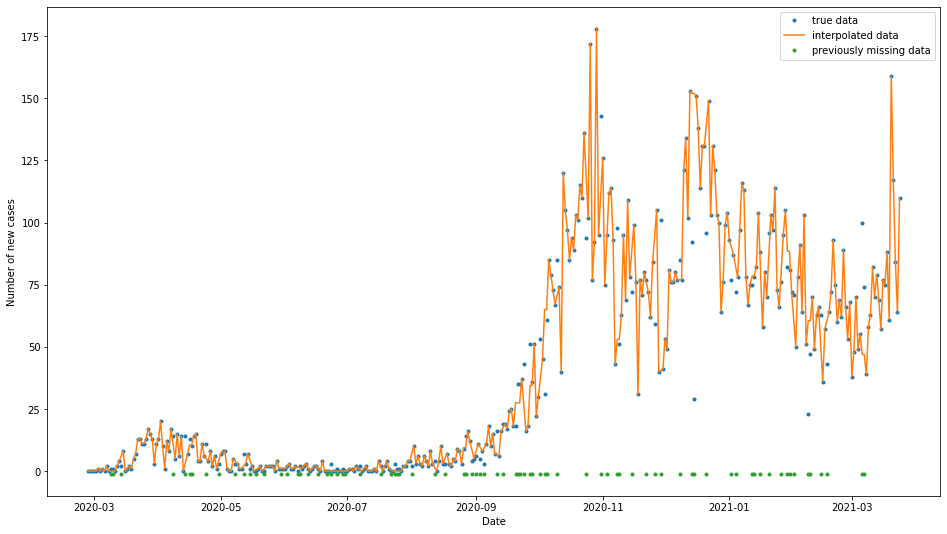

In [57]:
interpolated_data = []
max_data_index = len(noisy_new_cases_per_day) - 1
for i, (date, x) in enumerate(noisy_new_cases_per_day):
    # If we have an impossible value
    if x == -1:
        delta_left = 1
        # Scan the left side for values that are not -1
        while noisy_new_cases_per_day[i - delta_left][1] == -1:
            delta_left += 1
            # If we're outside of the data we can't do interpolation. It would be extrapolation.
            if i - delta_left < 0:
                continue
    
        # Scan the right side for values that are not -1
        delta_right = 1
        while noisy_new_cases_per_day[i + delta_right][1] == -1:
            delta_right += 1
            # If we're outside of the data we can't do interpolation. It would be extrapolation.
            if i + delta_right > max_data_index:
                continue
        
        # Finally use the mean of two nearest useful values
        interpolated_value = ((noisy_new_cases_per_day[i - delta_left][1]
                               + noisy_new_cases_per_day[i + delta_right][1])
                              / 2)
        interpolated_data.append((date, interpolated_value))
    else:
        interpolated_data.append((date, x))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot([date for date, _ in new_cases_per_day],
        [cases for _, cases in new_cases_per_day], '.', label='true data')
ax.plot([date for date, _ in interpolated_data],
        [cases for _, cases in interpolated_data],
        label='interpolated data')
ax.plot([date for (date, cases) in noisy_new_cases_per_day if cases == -1],
        [cases for _, cases in noisy_new_cases_per_day if cases == -1], '.',
        label='previously missing data')
ax.set_xlabel('Date')
ax.set_ylabel('Number of new cases')
ax.legend();

**19. Is this a good way to fill in missing values, in your opinion? Explain.**

*TODO: I think it could work if their are not many missing values in a order, like their is a week missing, Their are al lot of 0 cases reported (interpolated) when the actuel reaports around 100, idealy the interpolation would take in toe account when the next day is also missing data it would use the next day and interpolate that.*

**20. In which cases will this way of filling in missing values work well, and when will it not work well at all? Give an example for both cases.**

*TODO: It is a bit the same answer like the previous question, when the missing data is fractmented, so in a week one day is missing this could work very wel.
When to many days in row are missing it wil proberbly give strange interpolations.*

## Conclusion

Data preparation may not be the most glamorous part of data analytics, but it is quite important. If we do not do it well, every analytics step that comes after will suffer. It is as they say: *garbage in, garbage out*.

It is also good to know that since most data preparation steps are quite general, there are plenty of tools that make doing it a lot easier and faster. All of the above filtering, selecting and interpolating can be done in a few lines of code! But now *you* know how it works under the hood, and why it's so important!